<a href="https://colab.research.google.com/github/Stitaprajna/AllMyProjects/blob/main/Fraud%20Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [158]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [159]:
df = pd.read_csv('/Fraud1.csv')
df.head()


,Unnamed: 0,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,0,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1,0
1,1,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1,0
2,2,1,TRANSFER,2806.0,C1420196421,2806.0,0.0,C972765878,0.0,0.0,1,0
3,3,1,CASH_OUT,2806.0,C2101527076,2806.0,0.0,C1007251739,26202.0,0.0,1,0
4,4,1,TRANSFER,20128.0,C137533655,20128.0,0.0,C1848415041,0.0,0.0,1,0


In [160]:

df.drop('Unnamed: 0',axis=1,inplace=True)

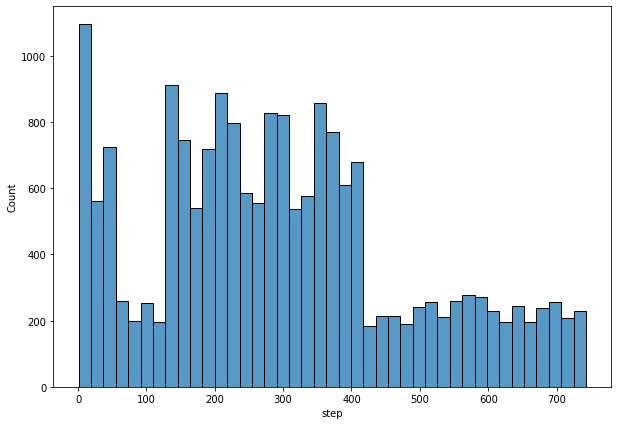

In [161]:
df.step.value_counts()
sns.histplot(df.step)
plt.rcParams['figure.figsize'] = [10,7]

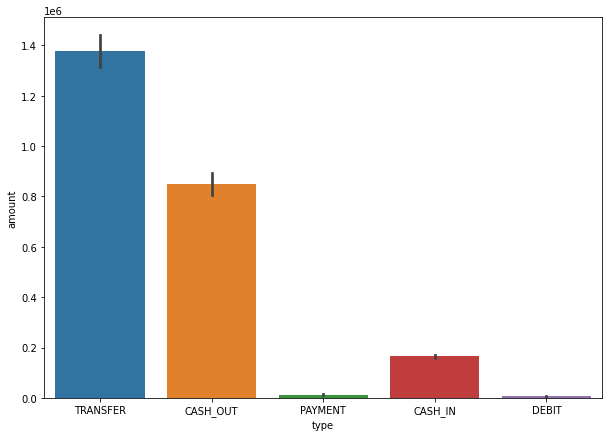

In [162]:
sns.barplot(x = 'type', y = 'amount', data=df)
plt.show()

So, most likely the 'Transfer' contains the fraud transactions because it very large in number.

In [163]:
df.isnull().sum()     # Checking for any missing data

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [164]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [165]:
df = df.dropna()      # Droping all NaN values

In [166]:
df.amount.describe()  # Describes various Statistical factors

count    1.882500e+04
mean     7.394670e+05
std      1.751749e+06
min      0.000000e+00
25%      3.097123e+04
50%      1.538701e+05
75%      4.563609e+05
max      1.954829e+07
Name: amount, dtype: float64

# Detecting Outliers through visualisations

In the above scatter plot we can see that some of the data point are away from other data points. Thus, these points are the anomaly and most likely these are the 'Fraud' transactions. But, we can't say much from such a plot and will need a deep analysis.

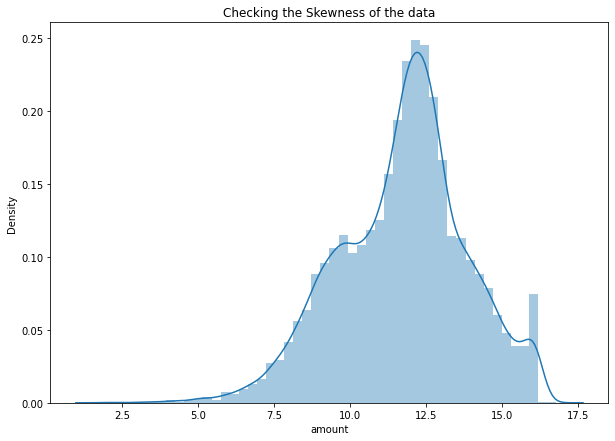

In [167]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
dff = df[df.amount!=0]
p = sns.distplot(np.log(dff['amount'])).set(title='Checking the Skewness of the data')  # Highly Right Skewed Data
#plt.ylim([0,10**(-8)])
#plt.xlim(0,3*10**7)
plt.rcParams['figure.figsize'] = [10,10]

The tail of the amount of transaction distribuation is towards right, so this might be a 'Right Skewed Gaussian Data'. Lets find out at the skewness.

In [168]:
from scipy.stats import skew
skew(df.amount)

3.902007725875123

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


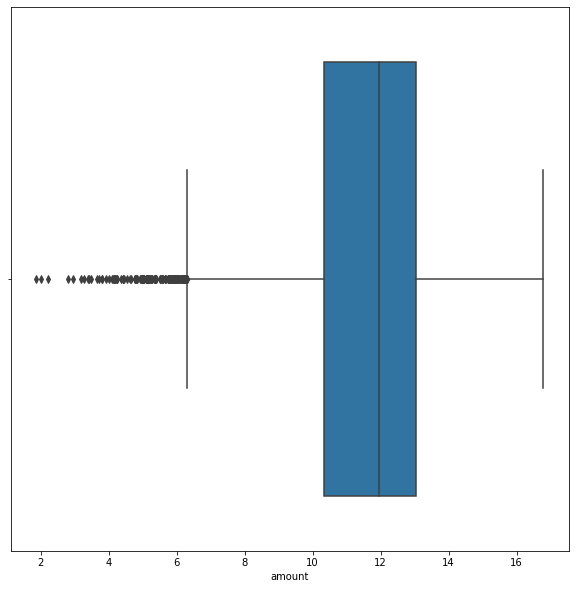

In [169]:
sns.boxplot(np.log(df.amount))
plt.show()
plt.rcParams['figure.figsize'] = [6,6]

In [170]:
df['isFraud'].value_counts()

0    10612
1     8213
Name: isFraud, dtype: int64

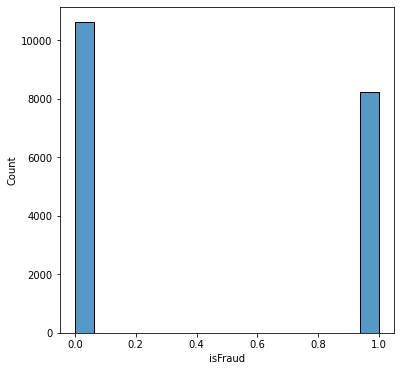

In [171]:
sns.histplot(df['isFraud'])

As, the number of fraud transactions are very less as compared to the normal transactions, this is an **Imbalanced Class**. Thus, accuracy score of any model will be very high and comapreble to the '**Dummy Classifier**'.

In [172]:
# Preprocessing and Cleaning Process
from sklearn.preprocessing import MinMaxScaler
Fraud = df[df['isFraud'] == 1]    
Normal = df[df['isFraud']==0]
df1 = df.copy()
df1 = pd.get_dummies(df1,columns=['type'])
df2 = df1.copy()
df2.drop(['nameOrig','nameDest'],axis=1,inplace=True)
x = df2.drop(['isFraud','isFlaggedFraud'],axis=1)
scaler = MinMaxScaler()
x1 = scaler.fit_transform(x)
y = df2.isFraud

In [173]:
x = pd.DataFrame(x1, columns=x.columns)

In [174]:
x.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,0.0,0.000009,0.000003,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.000009,0.000003,0.0,0.000090,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.000144,0.000047,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.000144,0.000047,0.0,0.000111,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.001030,0.000338,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.0


In [175]:
change = ['step','type_CASH_IN','type_CASH_OUT',	'type_DEBIT',	'type_PAYMENT',	'type_TRANSFER']
 
    
for i in change:
  x[i] = x[i].apply(lambda x: int(x))

In [176]:
x.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,0,0.000009,0.000003,0.0,0.000000,0.0,0,0,0,0,1
1,0,0.000009,0.000003,0.0,0.000090,0.0,0,1,0,0,0
2,0,0.000144,0.000047,0.0,0.000000,0.0,0,0,0,0,1
3,0,0.000144,0.000047,0.0,0.000111,0.0,0,1,0,0,0
4,0,0.001030,0.000338,0.0,0.000000,0.0,0,0,0,0,1


# Statistical measures of the Fraud  & Normal transactions

In [177]:
Fraud.amount.describe()

count    8.213000e+03
mean     1.467967e+06
std      2.404253e+06
min      0.000000e+00
25%      1.270913e+05
50%      4.414234e+05
75%      1.517771e+06
max      1.000000e+07
Name: amount, dtype: float64

In [178]:
Normal.amount.describe()

count    1.061200e+04
mean     1.756551e+05
std      4.914422e+05
min      6.440000e+00
25%      1.346005e+04
50%      7.351642e+04
75%      2.049134e+05
max      1.954829e+07
Name: amount, dtype: float64

# Checking the amounts for Fraud vs Normal transations

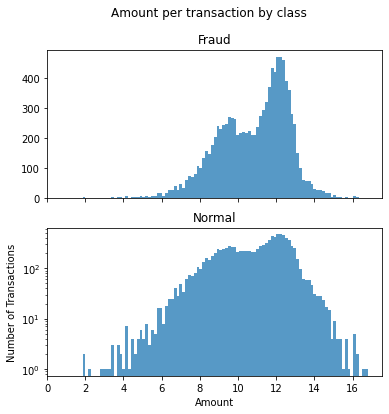

In [179]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True) 
f.suptitle('Amount per transaction by class')
bins = 100
ax1.hist(np.log(dff[dff.isFraud==0].amount), bins = bins,alpha=0.75)
ax1.set_title('Fraud')
ax2.hist(np.log(Normal.amount), bins = bins,alpha=0.75)
ax2.set_title('Normal')
plt.xlabel('Amount')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.rcParams['figure.figsize'] = [10, 7]
#plt.grid(True)
#ax1.grid(True)
plt.xlim([0,None])
plt.show()

The above plot compares the amount of 'Normal' vs 'Fraud' transactions. This shows fraudalent transactions are less in counts, but still have statistical significance.

# Model Selection Process

So, as we can see that this dataset contains Categorical as well as Numeric data, it will be good to use a 
**'Descision Tree Classifier'**. But, we have many optimised versions of the 'Descision Tree Classifier', we will use them one by one any evalute the best model upon the performance metrics.

In [180]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

In [181]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3)           # Diving the dataset into training and testing dataset

In [182]:
y_test.value_counts()

0    3163
1    2485
Name: isFraud, dtype: int64

In [183]:
outlier_fraction = len(Fraud)/len(Normal)

In [238]:
Isf = IsolationForest(max_samples=len(x_train), verbose=0, n_estimators=100)
lof = LocalOutlierFactor()
svm = SVC()
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()
xg = XGBClassifier()
Ada = AdaBoostClassifier()

In [239]:
y_prec = lof.fit_predict(x_test)
Isf.fit(x_train,y_train)
y_pred = Isf.predict(x_test)
svm.fit(x_train,y_train)
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1

# Choosing the right evaluation Metrics

We have to choose a different evaluation matrics other than the '**Accuracy**'. This is because, in an imbalanced dataset, the **'Accuracy Score'** might not be meaningfull or might not help in specific instances. For, this particular instance, we would like
to detect the 'Fraudlent' transactions, by keeping in mind that no '**Normal**' transaction is refered as '**Fraudlent**'. Also, no '**Fraudlent**' transaction should be refered as '**Noraml**'. These are also called the '**Type-I Error** and  '**Type-II Error** in statistics.
         

  # Prescision, Recall & Area Under Curve (AUC)
  '**Precesion**' and '**Recall**' are the evaluation metrics very usefull for specific purposes. '**Precesion**' is the ratio of '**True Positive**' and the sum of both '**True** **Positive**' and '**False** **Positive**'. Here, the '**True Positive**' is **Fraud Detection**. Similarly, in 'Recall' instead of '**False Positive**' it is '**False Negetive**'. Now, by keeping a '**Descision Thersold**', we will get different values of the both. And, if we plot them, we get a curve also known as the '**ROC**'. The area under this curve is important, because it's a measure of the desirable values of the both 'Precesion' and 'Recall'. This is also called the **Area Under Curve (AUC)**. 

# Choosing the best model w.r.t the AUC score

In [186]:
from sklearn.metrics import classification_report,accuracy_score,roc_auc_score,precision_score, confusion_matrix,recall_score

In [244]:
# Local Outlier Factor
y_prec[y_prec == 1] = 0
y_prec[y_prec == -1] = 1   

In [188]:
y_presvm = svm.predict(x_test)  # SVM 
recall_score(y_test,y_presvm)

0.7030181086519115

Model: SVM
Accuracy: 0.8302053824362606


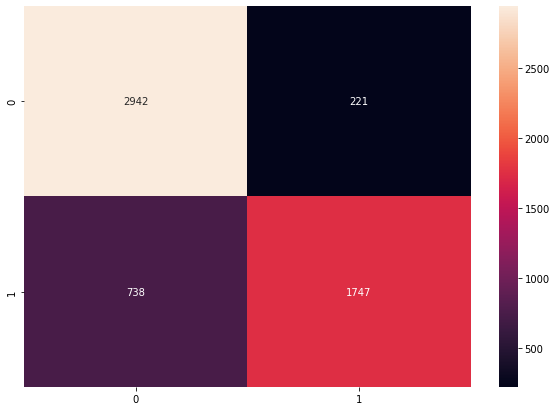

In [240]:
print('Model: SVM')

cm11 = confusion_matrix(y_test,y_presvm)
print('Accuracy:', svm.score(x_test, y_test))
sns.heatmap(cm11,annot=True,fmt='d')
plt.show()

Predicted Fraud: 0/61

In [190]:
precision_score(y_test,y_pred)    # Isolation Forestb

0.35121951219512193

Model: Isolation Forest


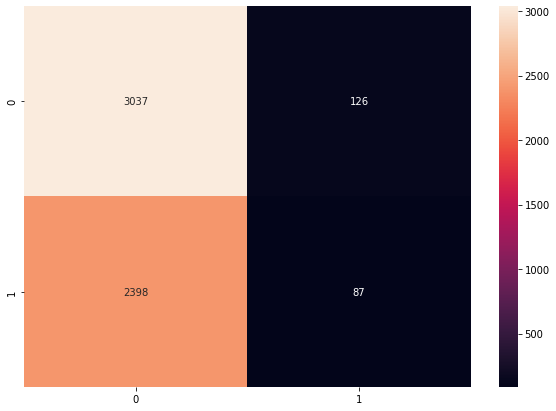

In [242]:
print('Model: Isolation Forest')
cm1 = confusion_matrix(y_test,y_pred)
sns.heatmap(cm1,annot=True, fmt='d')
plt.show()

Predicted Fraud: 7/61

In [192]:
precision_score(y_test, y_prec)   # Local Outlier Factor

0.24861878453038674

Model: Local outlier Factor


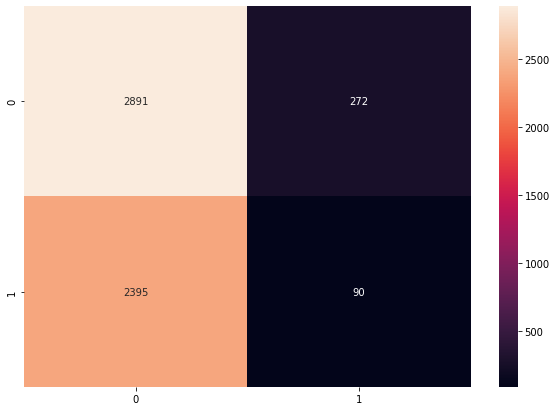

In [245]:
print('Model: Local outlier Factor')
cm1 = confusion_matrix(y_test,y_prec)
sns.heatmap(cm1,annot=True, fmt='d')
plt.show()

Predicted Fraud: 12/61

In [271]:
rf.fit(x_train,y_train)         # Random Forest
y_prerf = rf.predict(x_test)

In [272]:
# Random Forest 
precision_score(y_test,y_prerf)   

0.9896124650419497

Model: Random Forest
Accuracy: 0.9939801699716714
Precision: 0.9896124650419497


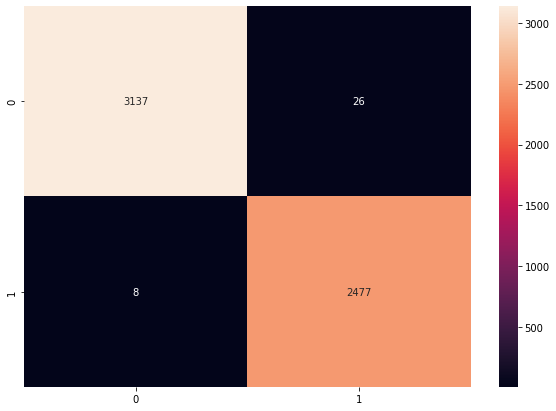

In [273]:
print('Model: Random Forest')
print('Accuracy:', rf.score(x_test, y_test))
print('Precision:', precision_score(y_test,y_prerf) )
cm1 = confusion_matrix(y_test,y_prerf)
sns.heatmap(cm1,annot=True, fmt='d')
plt.show()

Predicted Fraud: 9/61

In [197]:
gb.fit(x_train,y_train)         # Gradiant Boost
y_pregb = gb.predict(x_test)    

In [198]:
precision_score(y_test,y_pregb)    # gradiant Boost  

0.9782951854775059

Model: Gradiant Boost
Accuracy: 0.9891997167138811


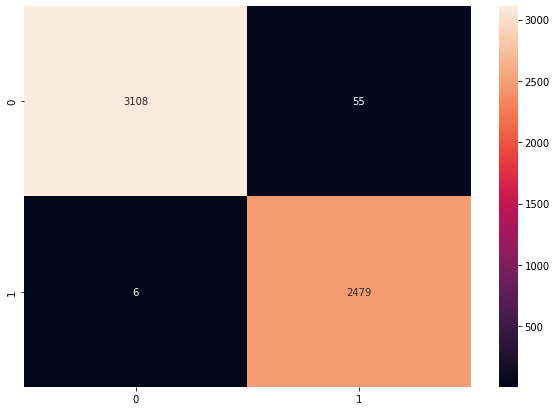

In [234]:
print('Model: Gradiant Boost')
print('Accuracy:', gb.score(x_test, y_test))
cm1 = confusion_matrix(y_test,y_pregb)
sns.heatmap(cm1,annot=True, fmt='d')
plt.show()

Predicted Fraud: 8/61

In [200]:
xg.fit(x_train,y_train)          # Xg Boost
y_prexg = xg.predict(x_test)

In [201]:
recall_score(y_test,y_prexg)    # Xg Boost (2nd Best Score)

0.9967806841046277

Model: Xg Boost
Accuracy: 0.988314447592068


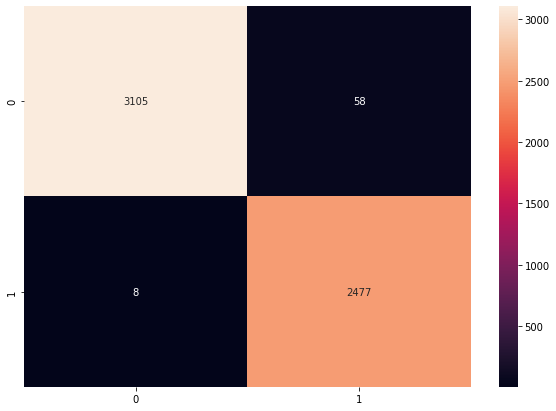

In [233]:
print('Model: Xg Boost')
print('Accuracy:', xg.score(x_test, y_test))
cm6 = confusion_matrix(y_test,y_prexg)
sns.heatmap(cm6,annot=True, fmt='d')
plt.show()

 Predicted Fraud: 3/61

In [247]:
Ada.fit(x_train,y_train)          # Ada Boost
y_preaba = Ada.predict(x_test)

In [248]:
precision_score(y_test,y_preaba)    # Ada Boost (3rd Best Score)

0.9594807238394965

Model: Ada Boost
Accuracy: 0.9736189801699717


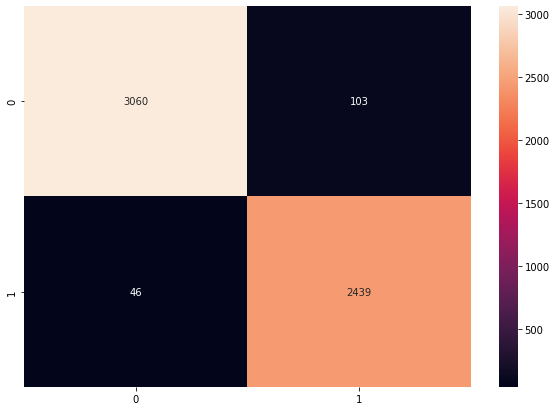

In [249]:
print('Model: Ada Boost')
print('Accuracy:', Ada.score(x_test, y_test))
cm8 = confusion_matrix(y_test,y_preaba)
sns.heatmap(cm8,annot=True, fmt='d')
plt.show()

In [263]:
# Neural Networks
from tensorflow import keras

model1 = keras.Sequential([
keras.layers.Dense(11, input_shape=(11,),activation='relu'),
#keras.layers.Dropout(0.2),
keras.layers.Dense(8,activation='relu'),
#keras.layers.Dropout(0.1),
keras.layers.Dense(5,activation='relu'),
#keras.layers.Dropout(0.1),
#keras.layers.Dense(3,activation='relu'),
#keras.layers.Dropout(0.1),
keras.layers.Dense(1,activation='sigmoid')])

model1.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
model1.fit(x_train, y_train, epochs=100)

Epoch 1/100
412/412 [==============================] - 1s 2ms/step - loss: 0.4875 - accuracy: 0.7353
Epoch 2/100
412/412 [==============================] - 1s 2ms/step - loss: 0.3753 - accuracy: 0.8177
Epoch 3/100
412/412 [==============================] - 1s 2ms/step - loss: 0.3467 - accuracy: 0.8390
Epoch 4/100
412/412 [==============================] - 1s 2ms/step - loss: 0.3242 - accuracy: 0.8460
Epoch 5/100
412/412 [==============================] - 1s 2ms/step - loss: 0.3045 - accuracy: 0.8546
Epoch 6/100
412/412 [==============================] - 1s 2ms/step - loss: 0.2861 - accuracy: 0.8633
Epoch 7/100
412/412 [==============================] - 1s 2ms/step - loss: 0.2709 - accuracy: 0.8704
Epoch 8/100
412/412 [==============================] - 1s 2ms/step - loss: 0.2573 - accuracy: 0.8820
Epoch 9/100
412/412 [==============================] - 1s 2ms/step - loss: 0.2458 - accuracy: 0.8894
Epoch 10/100
412/412 [==============================] - 1s 2ms/step - loss: 0.2361 - accura

In [264]:
model1.evaluate(x_test, y_test)

177/177 [==============================] - 0s 2ms/step - loss: 0.0526 - accuracy: 0.9892


[0.0526481457054615, 0.989199697971344]

In [265]:
y_pn = model1.predict(x_test)

In [266]:
 y_prn = []
for i in y_pn:
  if i>0.5:
    y_prn.append(1)  
  else:
    y_prn.append(0)

In [267]:
precision_score(y_test,y_prn)

0.9794303797468354

Model: Neural Networks
Precision: 0.9794303797468354


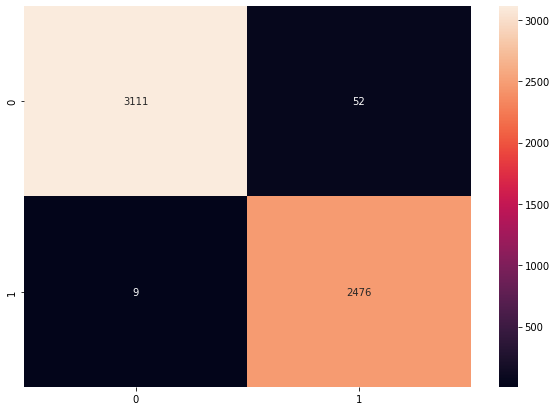

In [274]:
print('Model: Neural Networks')
print('Precision:',precision_score(y_test,y_prn))
cmm = confusion_matrix(y_test,y_prn)
sns.heatmap(cmm, annot=True, fmt='d')
plt.show()

Predicted Fraud: 0/61

In [212]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
1,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
2,1,TRANSFER,2806.00,C1420196421,2806.00,0.00,C972765878,0.00,0.00,1,0
3,1,CASH_OUT,2806.00,C2101527076,2806.00,0.00,C1007251739,26202.00,0.00,1,0
4,1,TRANSFER,20128.00,C137533655,20128.00,0.00,C1848415041,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
18820,403,CASH_OUT,16971.21,C1304107248,0.00,0.00,C946391772,416282.79,433253.99,0,0
18821,599,CASH_OUT,244427.31,C618233129,0.00,0.00,C2023401262,1705234.90,1949662.21,0,0
18822,346,CASH_IN,316416.17,C1975369261,2731519.61,3047935.77,C724164228,1083263.94,766847.77,0,0
18823,183,CASH_OUT,36850.21,C647402964,0.00,0.00,C953475799,884986.80,921837.01,0,0


AS, we compared many ML classifiers to see which one will be best for the detection of the fraud. Although, the model accuracy score was very high for all the models, which is a clear sign of an **imbalaned class**. So, the names of the ML models according to their best **AUC scores** are:

(i)  Gradiant Boost

(ii)  Random Forest

(iii)  Xg Boost 

(iv) Ada Boost

(v) SVM

# Conclusions

Thus, we can use '**Gradiant Boost**' to detect the fraudalent transaction for this dataset. This model will ensure that maxmimum fraud transactions are detected, while keeping in mind that we are minimizing the declaration of a normal transtion as fradulant.

While updating the infrastructure, the company should protect its old data, like it should keep the 'features names' very secret on which the fraud detection is being made. If new features are being added, then a Principal Component Analysis (PCA) to make best choices. This should also be compared to the old model for chosing a better model. 

# Note

AS the dataset is very large and due to constrains of the Goggle Colab, a sample of the original data has been used for the model building and analysis. 